<!-- dom:TITLE: Beregningsoppgave 5: Vannpotensial -->
# Beregningsoppgave 5: Vannpotensial
<!-- AUTHOR: Melinka Alonso Butenko, Mikkel Lepperød -->

<!-- DATE: today -->

<!-- TOC: on -->

**Etter at dere har gjort denne oppgaven skal dere kunne forklare**
* Forskjellen på interpolering og lineær regresjon

* Hvordan man beregner vannpotensial i en åpen beholder

* Hvordan man beregner trykkpotensial fra kapilærkrefter og hvordan dette skiller seg fra hydrostatisk trykkpotensial





<!-- --- begin exercise --- -->

## Exercise 1: Water potential
<div id="ex:diff"></div>

The physical property that predicts the direction in which water will flow is
called water potential, a quality that includes the effects of solute
concentration and physical pressure.
Free water moves from regions of higher water potential to regions of lower
water potential if there is no barrier to its flow. Osmosis is the movement of
water across cell membranes due to differences in solute concentration on either
side of a membrane. The likelihood of water movement can be calculated by
determining the water potential on either side of the membrane. For example,
if a plant cell is immersed in a solution that has higher water potential,
water will move into the cell, causing it to expand. Solute concentration and
physical pressure are the major determinants of water potential.
The formulas to calculate water potential are as follows:

\begin{align*}
&\Psi = \Psi_s + \Psi_p\\
&\Psi_s = -iCRT
\end{align*}

Here, the total potential $\Psi$ is determined by the sum of the solute
potential $\Psi_s$ and a pressure potential $\Psi_p$.
The solute potential $\Psi_s$ is further determined by a negative product of
the ionization constant $i$, the molecular consentration $C$, the pressure
constant $R$ and the temperature $T$ given in Kelvin ($^\circ C + 273$).

You perform the following experiment: You take a zucchini squash and peel it
and divide it into eleven identical cubes that each weigh $100g$.
You then place each of them into different sucrose solutions for 24 hours in an
OPEN container and at a constant temperature of $21^\circ C$.
You then remove the cubes from the solution, dry them on paper towels,
and then weigh them. You get the following results:

<table border="1">
<thead>
<tr><th align="center">CUBE</th> <th align="center">Weight (g)</th> <th align="center">Sucrose concentration (M)</th> </tr>
</thead>
<tbody>
<tr><td align="center">   1       </td> <td align="center">   120           </td> <td align="center">   0                            </td> </tr>
<tr><td align="center">   2       </td> <td align="center">   110           </td> <td align="center">   0.2                          </td> </tr>
<tr><td align="center">   3       </td> <td align="center">   94            </td> <td align="center">   0.4                          </td> </tr>
<tr><td align="center">   4       </td> <td align="center">   84            </td> <td align="center">   0.6                          </td> </tr>
<tr><td align="center">   5       </td> <td align="center">   74            </td> <td align="center">   0.8                          </td> </tr>
<tr><td align="center">   6       </td> <td align="center">   70            </td> <td align="center">   1                            </td> </tr>
<tr><td align="center">   7       </td> <td align="center">   63            </td> <td align="center">   1.2                          </td> </tr>
<tr><td align="center">   8       </td> <td align="center">   62            </td> <td align="center">   1.5                          </td> </tr>
<tr><td align="center">   9       </td> <td align="center">   60            </td> <td align="center">   2                            </td> </tr>
<tr><td align="center">   10      </td> <td align="center">   60            </td> <td align="center">   2.5                          </td> </tr>
<tr><td align="center">   11      </td> <td align="center">   60            </td> <td align="center">   3                            </td> </tr>
</tbody>
</table>

**NOTE**: this table is available in sucrose_weight.csv

**Interpolation.**

Let $x$ and $y$ be arrays of values given by some function $f$: $y = f(x)$, for example
$f$ can be the function that calculates the weight of zucchini squash ($y$) given a
sucrose concentration $x$. It is not feasible to measure all possible values
of $x$ (that would simply be to much work), but nevertheless, values of $y$ at
points of $x$ that are not measured can be desireable to acquire. One way to
approximate such values is to interpolate. Imagine you are interested in
the weight of zucchini squash at $1.1M$ sucrose concentration. This value is
not measured and thus not contained in the array $x$. With pen and paper,
we can easily draw a coordinate system and mark each point in $x$ and $y$,
draw a line between $x = 1$ and $x = 1.2$.
Then, on this line, mark the point at $x = 1.1$ and see which value of $y$ it
corresponds to.
That is called linear interpolation.
However, we want to use Python to do this.



The interpolated point $(x, y)$ on the line between two points $(x_0, y_0)$ and $(x_1, y_1)$ is
given by

$$
\frac{y - y_0}{x - x_0} = \frac{y_1 - y_0}{x_1 - x_0}
$$

**a)**
Write a program that takes two arrays `x` and `y`, each containing the values
`x = [2.3, 2.4]` and `y = [71, 75]` and calculates by linear interpolation the
value of $y$ at $x = 2.33$.

In [1]:
# code here

<!-- --- begin solution of exercise --- -->
**Solution.**

In [2]:
from pylab import *
x = array([2.3, 2.4])
y = array([71, 75])

def interpolate(x0, x1, y0, y1, x):
    return (x - x0) * (y1 - y0) / (x1 - x0) + y0

print('y =', interpolate(x[0], x[1], y[0], y[1], 2.33))

y = 72.2


<!-- --- end solution of exercise --- -->

**b)**
Does the function $f$ have to be linear in order to do linear interpolation?


<!-- --- begin solution of exercise --- -->
**Solution.**
No, it's called linear interpolation because we approximate the function $f$
linearly between the points $(x_0, y_0)$ and $(x_1, y_1)$.
However, if one looks at more than two points, $f$ can be any type of function.

<!-- --- end solution of exercise --- -->

**Linear regression.**

Again, $x$ and $y$ are arrays of values used to approximate some function
$f$: $y = f(x)$. However, now we assume that the function $f$ is linear, and
thus want to approximate it with the model $y = a + bx$ where $a$ is the
intersection of the line $x=0$ and $b$ is the slope of the line.
With pen and paper this is easy, we simply draw all the points and then a
line that looks to be close enough to all the points.
However, how do we know that the line we draw is a good line, or even, the best line?
To calculate the best line, the most common way is to find the minimum sum of squares of the residuals
(see video below for an explanation).


<!-- dom:MOVIE: [https://www.youtube.com/watch?v=yMgFHbjbAW8, width=420 height=315] -->
<!-- begin movie -->

In [3]:
from IPython.display import HTML
_s = """
<iframe width="420" height="315" src="https://www.youtube.com/embed/yMgFHbjbAW8" frameborder="0" allowfullscreen></iframe>
"""
HTML(_s)

<!-- end movie -->


The formulae for the best line to fit the data points is given by

\begin{align*}
&b = \frac{\bar{xy} - \bar{x}\bar{y}}{\bar{x^2} - (\bar{x})^2}\\
&a = \bar{y} - b\bar{x}
\end{align*}

Here, $\bar{xy}$ is the mean of the product of $x$ and $y$ (that is $\frac{1}{N}\sum xy$ where N is the number of measurements in $x$ or $y$),
$\bar{x}$ is the mean of $x$, $\bar{x^2}$ is the mean of the square $x^2$ (that is $\frac{1}{N}\sum xx$) and $(\bar{x})^2$ is the square of the mean of $x$.

If you want to understand how these formulaes are derived it is highly recommended to wach the
[Kahn academy series on least squares regression](https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/squared-error-of-regression-line)

**c)**
Write a program that uses the above formulaes to calculate the regression line
$y = a + bx$ given two arrays `x` and `y`.

In [4]:
# code here

<!-- --- begin solution of exercise --- -->
**Solution.**

In [5]:
def linear_regression(x, y):
    b = (mean(x * y) - mean(x) * mean(y)) / (mean(x ** 2) - mean(x) ** 2)
    a = mean(y) - b * mean(x)
    return a, b

<!-- --- end solution of exercise --- -->

Assume that the zucchini keeps a temperature of $21^\circ C$.
The ionization constant of sucrose is $1$, $R$ is $0.0831$ L Bar/moles K

**d)**
Scatter plot (use `scatter`) the **percent change in mass** of the cubes against the sucrose concentration.
Label the axes.

<!-- --- begin solution of exercise --- -->
**Solution.**

Text(0, 0.5, 'Percent change in mass (%)')

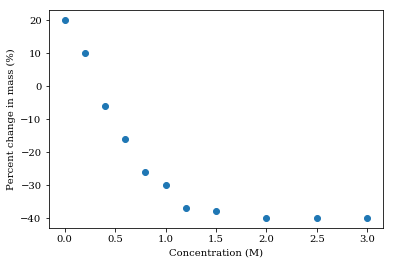

In [6]:
import pandas as pd

data = pd.read_csv('sucrose_weight.csv')
# percent change in mass is weight / 100 * 100 which is the same as the weight
scatter(data['concentration'], data['weight'] - 100)
xlabel('Concentration (M)')
ylabel('Percent change in mass (%)')

<!-- --- end solution of exercise --- -->

**Hint:** what is the pressure potential in an OPEN container?

**e)**
Calculate the water potential of the zucchini by means of linear interpolation.
Plot the interpolated data and mark the data points (use `marker='*'` in the plot function).
Label the axes.

<!-- --- begin solution of exercise --- -->
**Solution.**
We want to calculate the concentration where there is no change in mass.
Looking at the table we can see that the percent change in mass goes from an
increase to a reduction between cube 2 and 3, thus we want to interpolate between
the concentrations $C = 0.2$ and $C = 0.4$. Using the formula above we let
x represent the concentrations and y the percent change in mass. Solving for $x$
we get

$$
x = (x_1 - x_0)\frac{y - y_0}{y_1 - y_0} + x_0
$$

The water potential for zucchini squash, calculated with interpolation is -7.99422


Text(0, 0.5, 'Percent change in mass (%)')

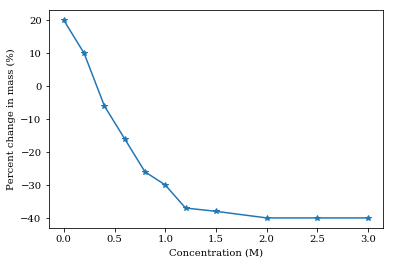

In [7]:
def interpolate_x(x0, x1, y0, y1, y):
    return (x1 - x0) * (y - y0) / (y1 - y0) + x0

# find C (x) when the percent change in mass is 0 (y = 0)
C = interpolate_x(0.2, 0.4, 10, -6, 0)
# Psi_p is 0 since the experiment is performed in an open container
# Thus Psi = Psi_s
# Finally we use the formula for water potential
i = 1
R = 0.0831
T = 23 + 273
Psi_interpolate = - i * C * R * T

print('The water potential for zucchini squash, calculated with interpolation is', Psi_interpolate)

# plot the data
plot(data['concentration'], data['weight'] - 100, marker='*')
xlabel('Concentration (M)')
ylabel('Percent change in mass (%)')

<!-- --- end solution of exercise --- -->

**f)**
Calculate the water potential of the zucchini by means of linear regression.
Plot the regression line on top of the scattered data, does the line look correct?
If not, make the necessary changes.

<!-- --- begin solution of exercise --- -->
**Solution.**

The water potential for zucchini squash, calculated with regression is -8.555686956521736


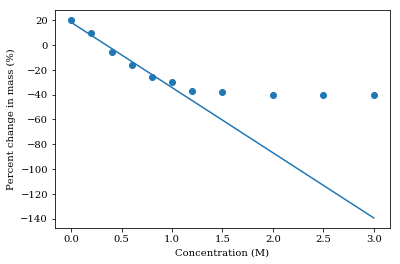

In [8]:
# there is only a linear change in the first 6 datapoints
concentration = data['concentration'][:6]
mass = data['weight'][:6]

a, b = linear_regression(concentration, mass - 100)

# Psi_p is 0 since the experiment is performed in an open container
# We find C with the regression line at 0 % change in mass C = (m - a) / b = -a/b:
C = - a / b
# Finally we use the formula for water potential
i = 1
R = 0.0831
T = 23 + 273
Psi_regression = - i * C * R * T

print('The water potential for zucchini squash, calculated with regression is', Psi_regression)


# plot the data
# first make a line that marks points of x
x = linspace(data['concentration'].min(), data['concentration'].max(), 100)
# calculate corresponding y
y = a + b * x
# scatter the data
scatter(data['concentration'], data['weight'] - 100)
xlabel('Concentration (M)')
ylabel('Percent change in mass (%)')
# plot the regression line
plt.plot(x, y)

<!-- --- end solution of exercise --- -->

**g)**
What is the difference between the water potential $\Psi$ calculated by means of interpolation and regression.
Which is the more correct method? Explain why you preffer the one method over the other.

<!-- --- begin solution of exercise --- -->
**Solution.**

In [9]:
print('Difference between water potential calculated by regression and interpolation is', Psi_regression - Psi_interpolate)

Difference between water potential calculated by regression and interpolation is -0.5614669565217358


In this case the linear regression gives a better estimate because the assumption
of linear change in mass between 0 and 1 M concentration is true and the
regression uses more datapoints in order to estimate the the concentration at
zero change in mass. Note that sometimes it is more correct to use an interpolation - when is that?

<!-- --- end solution of exercise --- -->

**h)**
What is the physical unit of the water potential $\Psi$

<!-- --- begin solution of exercise --- -->
**Solution.**
Bar

<!-- --- end solution of exercise --- -->

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 2: Tree physics

One of the fundamental problems trees have to solve is how to transport water up to the leaves.
The ability to solve this problem poses a constraint on the maximum height of trees.
In plants, most of the water transport occurs in water conducting cells of the xylem, the tracheids and vessel elements.
These cells are tubular, elongated cells.


**a)**
Let us assume that the only pressure holding a column of water in a tree is atmospheric pressure (0.1013 MPa).
Furthermore, assume that water transport occurs in a single continuous vessel element.
If this was the case and you had a tree growing close to the Oslo fjord,
what would the maximum height of the column of water in this tree be?
Note that $Pa = N/m^2$ and $N = kg m/s^2$

        Answer here:


<!-- --- begin solution of exercise --- -->
**Solution.**
The height potential is given by

$$
\begin{align*}
\Delta p = - \rho g h,
\end{align*}
$$

where $\rho$ is the density ($\rho_{water} = 997 kg/m^3$), $g = 9.81 m/s^2$ is the gravitational constant and $h$ is height.
First we convert the atmospheric pressure to $N/m^2$ by (0.1013 * 10^6 N/m^2) and solve the height potential for h

\begin{align*}
h &= \frac{\Delta p}{- \rho g}\\
&= \frac{0.1013 \times 10^6 N/m^2}{- 997 kg/m^3 \times 9.81 m/s^2}\\
&= - \frac{0.1013 \times 10^6 kg/(ms^2)}{997 \times 9.81 kg/(m^2s^2)}\\
&= 10.35 m
\end{align*}

<!-- --- end solution of exercise --- -->

The pressure potential from capillary forces (ahesion and cohesion) are given by

$$
\begin{align*}
\Delta p = - \frac{-2\gamma\cos\alpha}{r}.
\end{align*}
$$

Here, $r$ is the radius of the tube and $\gamma$ is the surface tension which
for water is $\gamma_{water} = 0.0728 N/m$.
The connection between adhesion and cohesion is given by the Young equation

$$
\begin{align*}
\text{adhesion} = \frac{1 + \cos\alpha}{2} \text{cohesion},
\end{align*}
$$

From the Young equation we see that if the contact angle between the liquid and
the surface is $\alpha = 0$ we get $\cos\alpha = 1$ and $\text{adhesion} = \text{cohesion}$.


**b)**
We assume that adhesion is equal to cohesion.
Calculate the radius of transport vessels that would allow a
sequoia tree to reach heights of 80 m by means of capillary forces?
How does this radius compare with the radius of typical transport vessels in real trees?

        Answer here:


<!-- --- begin solution of exercise --- -->
**Solution.**

\begin{align*}
&- \rho g h = - \frac{-2\gamma\cos\alpha}{r}\\
r &= \frac{-2\gamma\cos\alpha}{\rho gh}\\
&= \frac{-2 \times 0.0728 J/m^2}{997 kg/m^3 \times 9.81 m/s^2 \times 80 m}\\
&= 1.86 × 10^{-7} m
\end{align*}

The radius of xylem is on around 5-20 micro meter
so one order of magnitude larger.
The computed xylem size is unrealistically small and we can conclude that capillary forces does not account for the large difference in pressure potential needed to transport water to the top of sequoia trees.

<!-- --- end solution of exercise --- -->

<!-- --- end exercise --- -->